# Survey: Analysis from Responses

## Introduction

- why a survey
- what are the main results

## Table of Contents:
* Introduction
* Analysis
    * Q1: what do respondants study?
    * Q2: what topics are the respondants interested in?
    * Q3: Is the study subject related to topic interest?
    * Qn: Who are the respondents? More questions...

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
#from csv file to pandas dataframe
file_name = 'data/survey_public_cloud_0717.csv'
df = pd.read_csv(file_name, dtype=str)

In [8]:
#clean from empty survey (those in preview mode)
df = df[df['Status'] == 'IP Address']

In [9]:
#sample answer
df.iloc[1,:]

StartDate                                              2018-07-12 07:55:03
EndDate                                                2018-07-12 07:59:26
Status                                                          IP Address
IPAddress                                                     65.112.10.93
Progress                                                               100
Duration (in seconds)                                                  263
Finished                                                              True
RecordedDate                                           2018-07-12 07:59:26
ResponseId                                               R_2pY5sabFbecacwx
RecipientLastName                                                      NaN
RecipientFirstName                                             Yingying LU
RecipientEmail                                         ylu@gsd.harvard.edu
ExternalReference                                                      NaN
LocationLatitude         

In [10]:
#convert object into string and string to lower case
df.loc[:,'Q23'] = df['Q23'].astype(str).str.lower()

In [11]:
#number of respondents?
print('The total number of respondants to the survey is {}'.format(len(df)))

The total number of respondants to the survey is 39


## what do respondants study?

In [12]:
#nan field update with unique entries with words that are not subjects (i.e. batteries)
print('The number of respondants that did not answer this question is {}'.format(len(df['Q23'].loc[df['Q23'] == 'nan'])))

The number of respondants that did not answer this question is 1


In [13]:
#get unique list of words
words_list = []
for i in df['Q23'].unique().tolist():
    single_entry = i.split(' ')
    for word in single_entry:
        words_list.append(word)
        
#remove dupilcates
unique_words_list = []
for i in words_list:
    if i not in unique_words_list:
        unique_words_list.append(i)

#select words that are not subject
words_to_remove_list = ['and', 'batteries', 'research', '(hks)','global','international','economics,','','nan','management',
                     'nutrition', 'economics', 'cardiovascular', 'phd,','curriculum', 'strategy', 'information', 'planning','science']
#set a list of subjects
subjects_list = list(set(unique_words_list) - set(words_to_remove_list))

In [14]:
#function to take a subject and create a list of binary values
def get_subject(list_name, subject_name, df, col):
    list_name =[]
    for idx, i in  enumerate (df[col]):
        if subject_name in i:
            #print(idx, i)
            list_name.append(1)
        else:
            list_name.append(0)
    return(list_name)

In [15]:
#generate columns for each subject
dictionary_subjects = dict()
for i in subjects_list:
    subject = 'S_{}'.format(i)
    values = get_subject(subject, i, df, 'Q23')
    #print(subject, values)
    dictionary_subjects[subject] = values
    
#transform dictionary into dataframe
df_subjects = pd.DataFrame.from_dict(dictionary_subjects,orient='index').transpose()

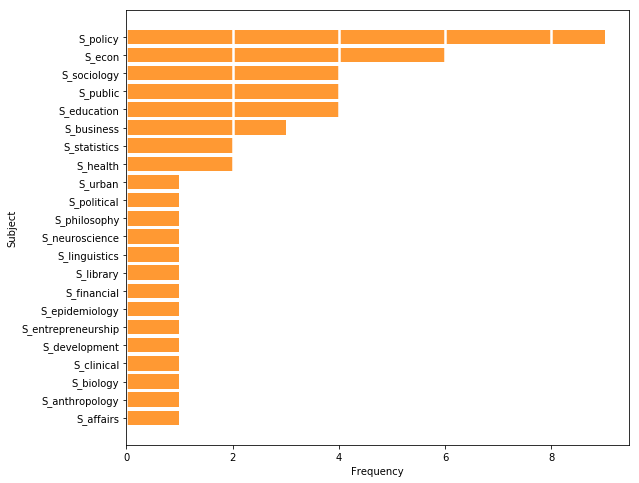

In [16]:
#set variable
subjects = df_subjects.columns.tolist()
occurence_by_subject = []

#compute number of occurences by subject
for col in df_subjects.columns.tolist():
    occurence_by_subject.append(df_subjects[col].sum())
    
#sort the two lists
occurence_by_subject, subjects = zip(*sorted(zip(occurence_by_subject, subjects)))

#plot horizontal bar
main_color = "#ff9933"
plt.figure(figsize=(9,8))
plt.barh(subjects, occurence_by_subject, color=main_color, align='center')
plt.gca().xaxis.grid(True,color='white', linewidth = 2.5)
plt.ylabel('Subject')
plt.xlabel('Frequency');

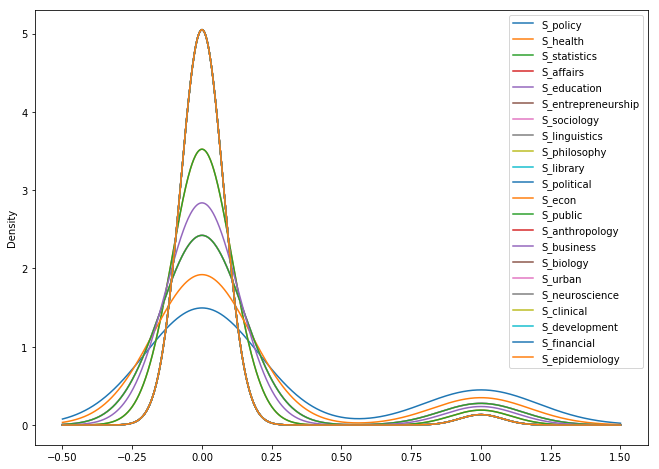

In [17]:
#bernoulli/kde distribution (0=non_subject, 1=subject)
for col in df_subjects.columns.tolist():
    df_subjects[col].plot(kind='kde', figsize=(11,8), legend="best")

## what are respondants interested in?

In [18]:
#topics and columns names
topic_name = ['captions_gen', 'speech_rec', 'text_cl', 'topic_mod']
col_idx = ['Q30_1','Q30_2','Q30_3','Q30_4']

#group by interest for each topic and count occurences
frames=[]
for name, idx in zip(topic_name, col_idx):
    #print(name, idx)
    group_by_interest = df.groupby(idx).size().reset_index().rename(columns={0:name})    
    frames.append(group_by_interest.set_index(idx).transpose())

#concatenate dataframes
result = pd.concat(frames)

#reorder columns
cols = ['Interested','Very Interested','Somehow interested','Not Interested']
result = result[cols]

#assign negative values to 
result['Not Interested'] = 0 - result['Not Interested']
result['Somehow interested'] = 0 - result['Somehow interested']

#set index and dataframe
index = pd.Index(result.index.tolist(), name='topic')
df_stacked = pd.DataFrame(result, index=index)

In [19]:
df_stacked

,Interested,Very Interested,Somehow interested,Not Interested
topic,,,,
captions_gen,5,10,-5,-18
speech_rec,4,9,-8,-17
text_cl,5,9,-10,-13
topic_mod,11,19,-4,-4


<Figure size 432x288 with 0 Axes>

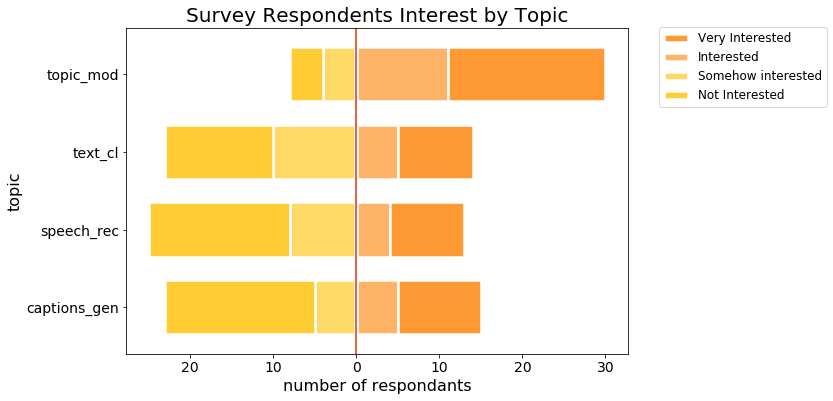

In [16]:
#config plot colors and labels
two_colors = ["#ffb366","#ff9933","#ffd966","#ffcc33"]
#two_colors_dark = ["#ffb366","#ff9933","#ffbf00","#cc9900"]
#one_color = ["#ffb366","#ff9933","#ffcc99","#ffe6cc"]

#font style
title_font_size = 20
ax_label_font_size = 16
tick_font_size = 14
legend_font_size = 12

#plot
fig = plt.figure();
#ax = fig.add_subplot(111)
ax = df_stacked.plot(kind='barh', stacked=True, color=two_colors, width=.7, linewidth='2.5', edgecolor='white', figsize=(9, 6))
plt.axvline(x=0, c='white', linewidth=5)
plt.axvline(x=0, c='#e62e00', linewidth=1.5)
plt.title('Survey Respondents Interest by Topic', size = title_font_size)
plt.ylabel('topic', size = ax_label_font_size)
plt.xlabel('number of respondants', size = ax_label_font_size)

#legend
patches, labels = ax.get_legend_handles_labels()
patches = [patches [1], patches [0], patches [2], patches[3]]
labels = [labels[1], labels[0], labels[2], labels[3]]
ax.legend(patches, labels, bbox_to_anchor=(1.05,1.02), loc="upper left", prop={'size': legend_font_size})

#change thicks
fig.canvas.draw()
ticks = [item.get_text() for item in ax.get_xticklabels()]
ticks = ['', '20', '10', '0', '10', '20', '30', '']
ax.set_xticklabels(ticks, size=tick_font_size)
ax.yaxis.set_tick_params(labelsize=tick_font_size);

## Is the study subject related to interest?

In [17]:
#### slice dataframe on topic interested
df_topic_interest = df[['Q30_1', 'Q30_2', 'Q30_3', 'Q30_4']].reset_index()
#fill nan with not interested
df_topic_interest = df_topic_interest.iloc[:,0:5].astype(object).fillna("Not Interested")
#concatenate study areas and subjects
df2 = pd.concat([df_topic_interest, df_subjects], axis=1).drop('index', axis=1)

In [18]:
def get_df_stacked(df):
    
    #topics and columns names
    topic_name = ['captions_gen', 'speech_rec', 'text_cl', 'topic_mod']
    col_idx = ['Q30_1','Q30_2','Q30_3','Q30_4']

    #group by interest for each topic and count occurences
    frames=[]
    for name, idx in zip(topic_name, col_idx):
        #print(name, idx)
        group_by_interest = df.groupby(idx).size().reset_index().rename(columns={0:name})    
        frames.append(group_by_interest.set_index(idx).transpose())

    #concatenate dataframes
    result = pd.concat(frames, sort=True)

    #reorder columns
    cols = ['Interested','Very Interested','Somehow interested','Not Interested']
    cols_reduced = ['Very Interested','Somehow interested','Not Interested']
    
    try:
        result = result[cols]
    except:
        result = result[cols_reduced]

    #assign negative values to 
    result['Not Interested'] = 0 - result['Not Interested']
    result['Somehow interested'] = 0 - result['Somehow interested']

    #set index and dataframe
    index = pd.Index(result.index.tolist(), name='topic')
    df_stacked = pd.DataFrame(result, index=index)
    
    return df_stacked

In [19]:
def plot_df_stacked(df, subject, ax):
    two_colors = ["#ffb366","#ff9933","#ffd966","#ffcc33"]
    #fig = plt.figure();
    ax2 = df.plot(ax=ax,kind='barh', stacked=True, color=two_colors, width=.7, legend=False, linewidth='2.5')
    ax.axvline(x=0, c='white', linewidth=4)
    ax.axvline(x=0, c='#e62e00', linewidth=1.5)
    ax.set_title('Interest by Topic: {}'.format(subject[2:]), size = 14)
    plt.ylabel('topic', size = 10)
    plt.xlabel('number of respondants', size = 10)
    return ax2

In [20]:
subs = []
df_list = []
for sub in subjects:
    if len(df2[df2[sub] == 1]) > 2:
        #print(sub)
        subs.append(sub)
        df_play = df2[df2[sub] == 1].iloc[:,0:4]
        df_list.append(get_df_stacked(df_play))

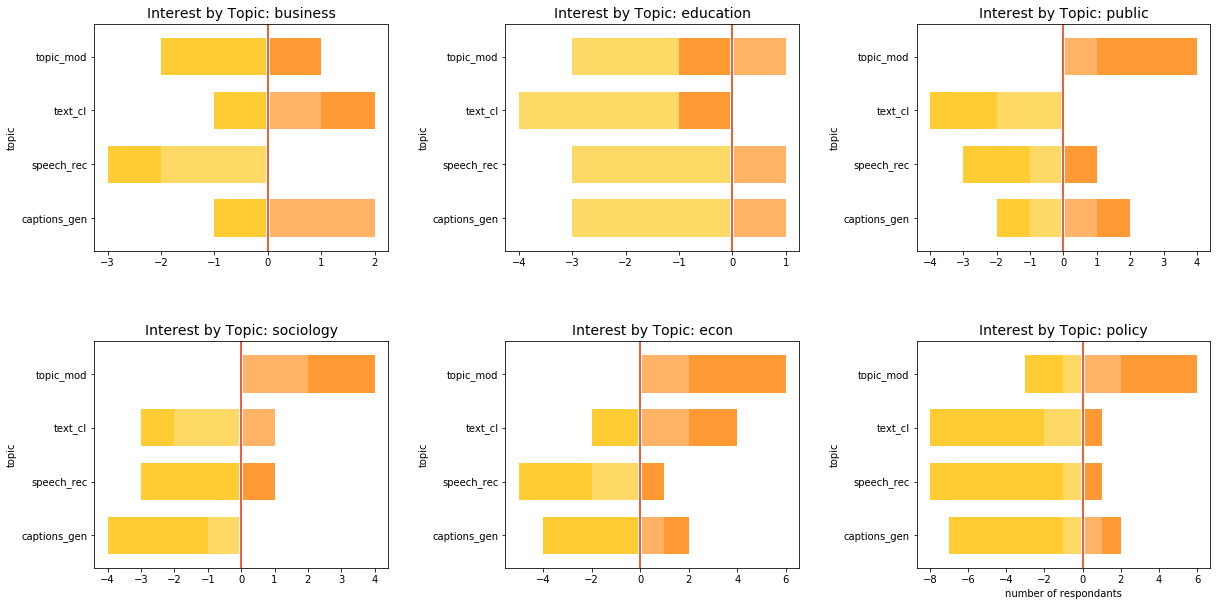

In [21]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for k,[frame, sub] in enumerate(zip(df_list, subs)):
    i = k//3
    j = k%3
    plot_df_stacked(frame, sub, ax[i,j])

## who are the respondents? More questions...

- How much respondents "play" with data? 'Q28'
- what programming/computing tools respondents know? 'Q29'
- what respondents would like to learn that it is not included in these topics?  'Q32', 'Q31'
- Who is looking for data support? 'Q25'
- where are respondents from? 'LocationLatitude', 'LocationLongitude
- Are people from different places interested in different topic or expert in other tools? interpolate more data
- How much interests from respondents? response rate by day/hour. 'EndDate'